In [1]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')
df1 = pd.read_csv('winemag-data-130k-v2.csv') #winemag-data-130k-v2
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


тип object, распредение по наиболее часто встречающимся странам

Text(0.5, 1.0, 'Top 15 most common wine countries')

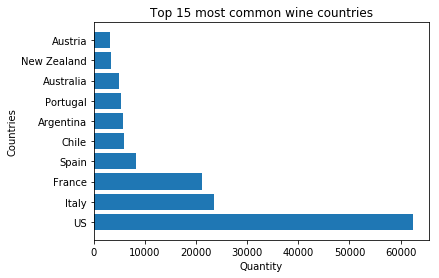

In [6]:
obj = df.groupby('country').count()['description'].reset_index()
obj.columns = ['country', 'count']
obj = obj.sort_values('count', ascending=False).head(10)
plt.barh(obj['country'],obj['count'])
plt.xlabel('Quantity')
plt.ylabel('Countries')
plt.title('Top 15 most common wine countries')

тип object и float, распредение по суммарной стоимости по странам 

Text(0.5, 1.0, 'Top 15 most expensive wine countries')

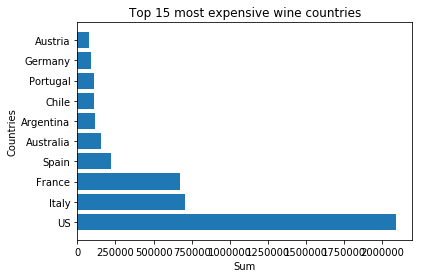

In [10]:
obj = df.groupby('country').sum()['price'].reset_index()
obj.columns = ['country', 'price']
obj = obj.sort_values('price', ascending=False).head(10)
plt.barh(obj['country'],obj['price'])
plt.xlabel('Sum')
plt.ylabel('Countries')
plt.title('Top 15 most expensive wine countries')


тип object и float, распредение по максимальной стоимости по странам 

<BarContainer object of 10 artists>

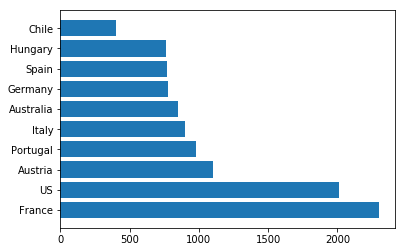

In [87]:
price = df.groupby('country').max()['price'].reset_index().sort_values('price', ascending=False).head(10)
price.price = price.price.astype('int64')
plt.barh(price['country'],price['price'])

In [ ]:
тип object и int64, распредение по максимальным балллам по странам

<BarContainer object of 10 artists>

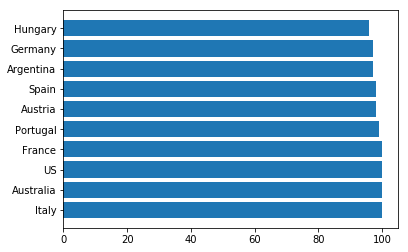

In [86]:
points = df.groupby('country').max()['points'].reset_index()
points = points.sort_values('points', ascending=False).head(10)
points.points = points.points.astype('int64')
plt.barh(points['country'],points['points'])
#points.head()

In [ ]:
тип object и float, гистограмма стоимости по странам

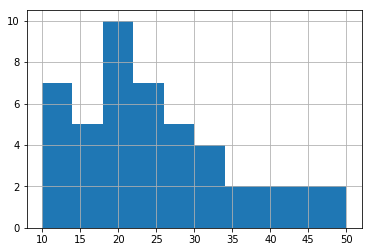

In [14]:
df1 = df.groupby('country').mean()
df1.price.hist()
#points.plot(kind='bar', rot=45)
#df1.points
#points.head()

тип object, распредение по кол-ву уникальным провинций по странам

C:\Users\kostyaev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


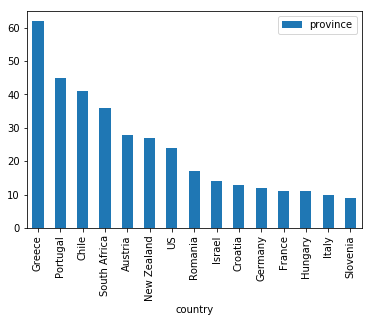

In [17]:
country_count = df[['country', 'province']]
country_count.drop_duplicates(keep = 'first', inplace = True)
country_count
#df.groupby([['country', 'province']]).count()

country_count = country_count.groupby('country').count().sort_values(by='province', ascending=False ).head(15)

 #.plot(kind='bar')

country_count.province = country_count.province.astype('int64')
country_count.plot(kind='bar')

тип object, распредение по кол-ву уникальных типов вин по странам

C:\Users\kostyaev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


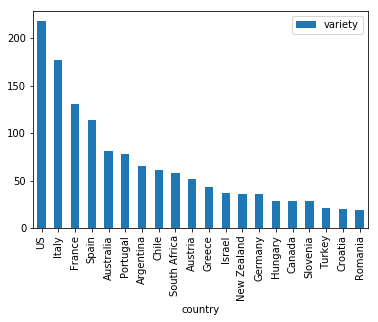

In [60]:
country_count = df[['country', 'variety']]
country_count.drop_duplicates(keep = 'first', inplace = True)
country_count
#df.groupby([['country', 'province']]).count()

country_count = country_count.groupby('country').count().sort_values(by='variety', ascending=False ).head(20)

 #.plot(kind='bar')

country_count.variety = country_count.variety.astype('int64')
country_count.plot(kind='bar')

C:\Users\kostyaev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price
variety,
Bordeaux-style Red Blend,2300.0
Chardonnay,2013.0
Grüner Veltliner,1100.0
Bordeaux-style White Blend,1000.0
Port,980.0


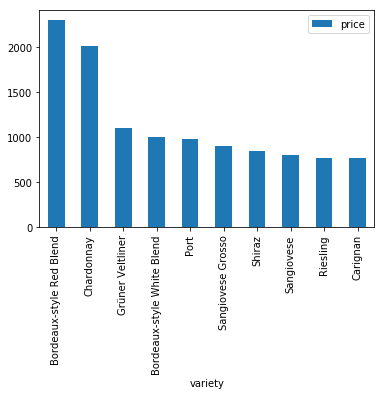

In [12]:
variety_points = df[['variety', 'price']]
variety_points.drop_duplicates(keep = 'first', inplace = True)
variety_points
#df.groupby([['country', 'province']]).count()

variety_points = variety_points.groupby('variety').max().sort_values(by='price', ascending=False ).head(10)

 #.plot(kind='bar')

#variety_points.variety = country_count.variety.astype('int64')
variety_points.plot(kind='bar')
variety_points.head()

C:\Users\kostyaev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,points
variety,
Chardonnay,100
Syrah,100
Red Blend,100
Muscat,100
Merlot,100
Pinot Noir,100
Prugnolo Gentile,100
Bordeaux-style White Blend,100
Cabernet Blend,100


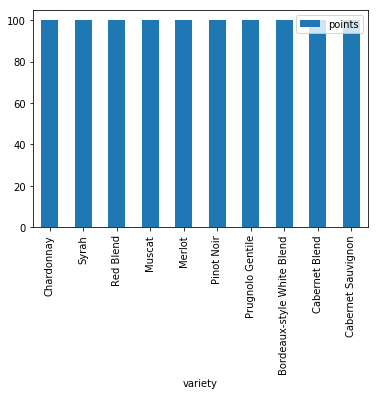

In [14]:
variety_points = df[['variety', 'points']]
variety_points.drop_duplicates(keep = 'first', inplace = True)
variety_points
#df.groupby([['country', 'province']]).count()

variety_points = variety_points.groupby('variety').max().sort_values(by='points', ascending=False ).head(10)

 #.plot(kind='bar')

#variety_points.variety = country_count.variety.astype('int64')
variety_points.plot(kind='bar')
variety_points.head(10)

In [4]:
import seaborn as sns

float, int64, cooтношение цен и баллов вин

C:\Users\kostyaev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kostyaev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


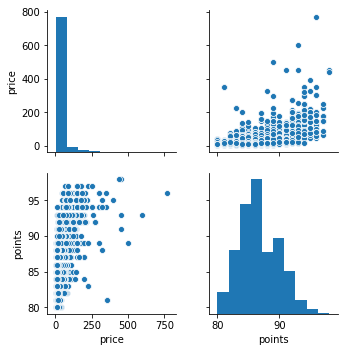

In [19]:
sns_plot = sns.pairplot(
    df_us[[ 'price', 'points']])
sns_plot

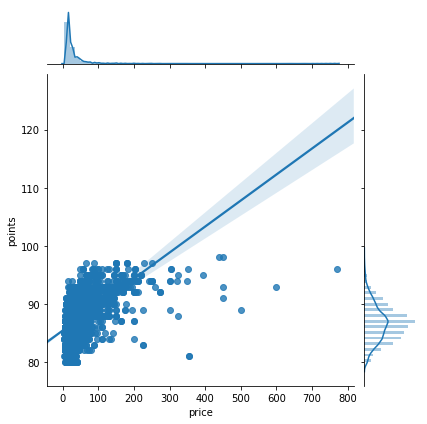

In [18]:
sns.jointplot(x='price', y='points', 
              data=df_us, kind='reg')

типы object, int64, , боксплот по топ 5 странам

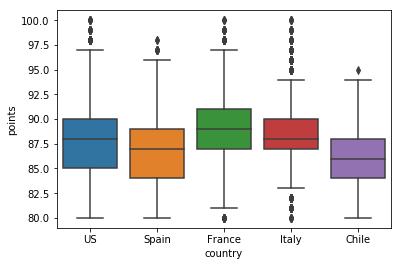

In [6]:
top_country = df.country.value_counts().sort_values(ascending = False).head(5).index.values
top_country
ax = sns.boxplot(x="country", y="points", 
            data=df[df.country.isin(top_country)])

In [22]:
df_us = df[df.country == 'Spain']
df_us.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
17,17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero


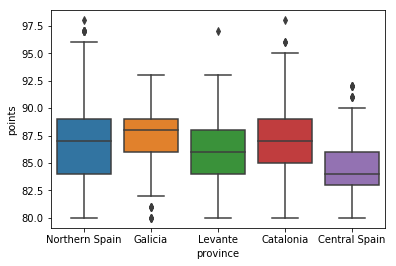

In [23]:
top_country = df_us.province.value_counts().sort_values(ascending = False).head(5).index.values

ax = sns.boxplot(x="province", y="points", 
            data=df_us[df_us.province.isin(top_country)])


тип object, float, определение средней цены по соотношению провинции и типа вина

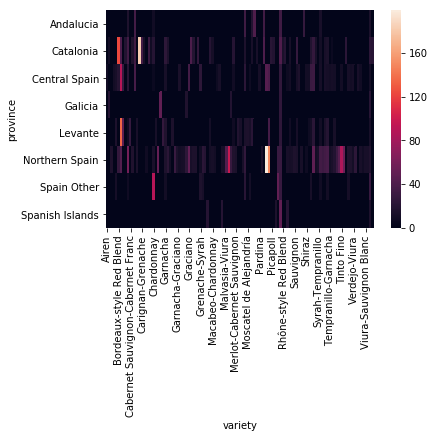

In [16]:

province_varirety = df_us.pivot_table(
                        index='province', 
                        columns='variety', 
                        values='price', 
                        aggfunc='mean').fillna(0).applymap(float)
province_varirety
ax = sns.heatmap(province_varirety)

In [ ]:
тип object, int64, определение средних баллов по соотношению провинции и типа вина

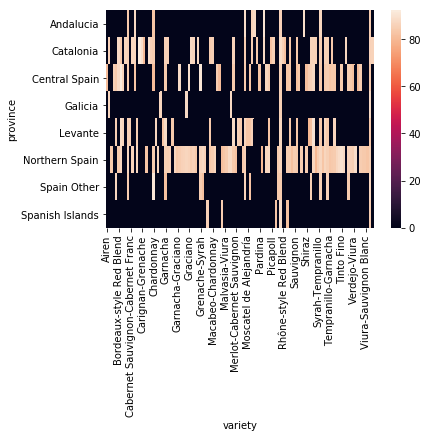

In [17]:
province_varirety = df_us.pivot_table(
                        index='province', 
                        columns='variety', 
                        values='points', 
                        aggfunc='mean').fillna(0).applymap(float)
province_varirety
ax = sns.heatmap(province_varirety)

ВЫВОД:
Наибольший ассортимент  и разнообразие вин представлено в US, Италии, Франции и Испании. 
Топ стран по суммарной стоимости аналогичный.

Максимальная стоимость вина из Франции. Сорт - Bordeaux-style Red Blend.
А максимально по популярное баллам (одинаково высокое) в 4 странах: Италия, Австралия, US и Франция.
По данным по всем странам вероятно есть взаимозависимость высокой цены и высоких баллов вину.

По графику боксплотов самая высокая медиана по баллам во Франции, разброс данных (1 и 3 квартили небольшой), но больше чем в Италии.

Для анализа возьмем 1 страну - Испанию.
И построим боксплоты по регионам.
Явно выделяется Galicia - тут самая высокая медиана, 1 и 3 квартили и небольшой разброс данных.
При постронии тепловой карты по регионам и типам вин в этой стране мы видим, что 2 самых догорих вида из Северной Испании и Каталонии, а максимальное кол-во видов с высокими баллами - из Северной Испании.